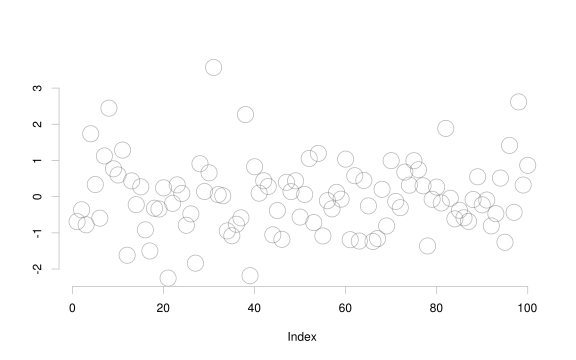

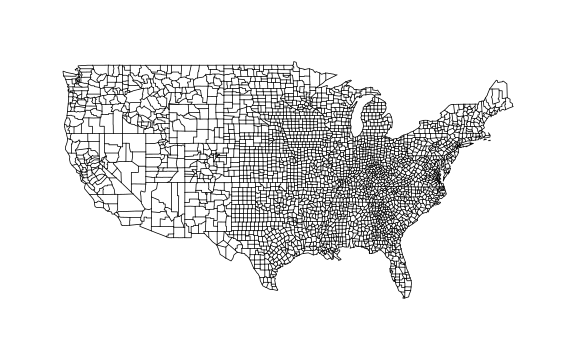

RCall.RObject{RCall.VecSxp}

Call:
lm(formula = y ~ X - 1)

Residuals:
       1        2        3 
0.024160 0.023180 0.007198 

Coefficients:
   Estimate Std. Error t value Pr(>|t|)  
X1 -1.61070    0.13101  -12.29   0.0517 .
X2  2.28882    0.04574   50.04   0.0127 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03425 on 1 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:  0.9999 
F-statistic: 1.068e+04 on 2 and 1 DF,  p-value: 0.006841



In [5]:
using RCall

# This works because "$x" is the string expression of x, which is literally "1:10"
# So, this makes sense in the R interpreter. If X = [1 2 3; 4 5 6], this wouldn't work
# The second and third line are the same
R_plot = R"plot"
rgb = R"rgb" 
R_plot(randn(100),ylab="",fg="grey",bty="n",cex=3,col=rgb(.3,.3,.3,.4))

# These two lines are the same. They load the library 'maps' into Julia. 
# Requires that you have installed the library in R.
R"library(maps)"
@rlibrary("maps")
R"map('county')"

# lm
b = reshape([2.0, 3.0], 2,1)
X = randn(3,2)
y = X * b + randn(3,1)
@rput y # sends Julia variable "y" to R with the same name ("y")
@rput X
reval(rparse("mod <- lm(y ~ X-1)"))
reval("summary(mod)")

R_lm(some_str_expr) = reval(rparse("lm(" * some_str_expr * ")"))
R_summary = R"summary"
mod = R_lm("y ~ X-1")
R_summary(mod)

In [6]:
randn(1)

1-element Array{Float64,1}:
 1.61448